In [2]:
!ls ../annotations | grep dino_

cs_256_dino_joint_knn_72_train_30_val.npy
cs_256_dino_knn_72_train_30_val.npy
cs_256_dino_val_pred_gmm.npy
cs_val_dino_knn_72_train_30_val_full.npy
cs_val_dino_knn_72_train_30_val_layer_10.npy
cs_val_dino_knn_72_train_30_val_layer_11.npy
cs_val_dino_knn_72_train_30_val_layer_12.npy
cs_val_dino_knn_72_train_30_val_layer_1.npy
cs_val_dino_knn_72_train_30_val_layer_2.npy
cs_val_dino_knn_72_train_30_val_layer_3.npy
cs_val_dino_knn_72_train_30_val_layer_4.npy
cs_val_dino_knn_72_train_30_val_layer_5.npy
cs_val_dino_knn_72_train_30_val_layer_6.npy
cs_val_dino_knn_72_train_30_val_layer_7.npy
cs_val_dino_knn_72_train_30_val_layer_8.npy
cs_val_dino_knn_72_train_30_val_layer_9.npy
eval_cs4pc_256_dino_knn_train_2_val_30.npy
eval_cs4pc_256_dino_knn_train_4_prime_val_30.npy
eval_cs4pc_256_dino_knn_train_8_val_30.npy
eval_cs4pc_dino_joined_256_val_knn_72_train_30_val_layer_10.npy
eval_cs4pc_dino_joined_256_val_knn_72_train_30_val_layer_11.npy
eval_cs4pc_dino_joined_256_val_knn_72_train_30_val_layer_1

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchmetrics import AUROC, ROC

In [160]:
# path = '../predictions/joint/'
# x = '../predictions/cropped/eval_mae_cs_patches_256_layer_12_linear_probs.npy'
# linear = np.load(x, allow_pickle=True).item()['images']
# x = '../predictions/cropped/eval_dino_cs_patches_256_layer_12_linear_probs.npy'
# linear_dino = np.load(x, allow_pickle=True).item()['images']

linear_mae_pred=np.load(path + 'eval_mae_joint_cs_patches_256_linear_layer_12.npy', allow_pickle=True)#.item()
knn_norm_mae = np.load(path + 'eval_mae_joint_cs_patches_256_knn_norm_on_train.npy', allow_pickle=True)
knn_mae = np.load('../annotations/eval_cs4pc_mae_joint_256_knn_72_train_72_val_30_layer_12.npy', allow_pickle=True)

In [161]:
path = '../predictions/joint/'
model='dino'
linear_dino_pred=np.load(path + f'eval_{model}_joint_cs_patches_256_linear_layer_12.npy', allow_pickle=True)#.item()
# knn_norm_dino = np.load(path + f'eval_{model}_joint_cs_patches_256_knn_norm_on_train.npy', allow_pickle=True)
knn_dino = np.load(f'../annotations/eval_cs4pc_{model}_joined_256_val_knn_72_train_30_val_layer_12.npy', allow_pickle=True)

In [5]:
linear[0]['patch_labels'].shape

(6664,)

In [22]:
auc = AUROC(task="multiclass", num_classes=34, average=None)
roc = ROC(task="multiclass", num_classes=34, thresholds=1000)

In [162]:
# preds_linear_mae = []
# gt = []
# for item in linear_mae_pred:
#     preds_linear_mae.append(item['patch_labels'].reshape(-1))
#     gt.append(item['black_image'].reshape(-1))
    
# preds_linear_mae = np.concatenate(preds_linear_mae, axis=0)
# gt = np.concatenate(gt, axis=0)


# preds_linear_dino = []
# gt = []
# for item in linear_dino_pred:
#     preds_linear_dino.append(item['patch_labels'].reshape(-1))
#     gt.append(item['black_image'].reshape(-1))
    
# preds_linear_dino = np.concatenate(preds_linear_dino, axis=0)
# gt = np.concatenate(gt, axis=0)



preds_linear_mae = []
gt = []
for item in linear:
    preds_linear_mae.append(item['patch_labels'].reshape(-1, 34))
    gt.append(item['patch_labels_gt'].reshape(-1))
    
preds_linear_mae = np.concatenate(preds_linear_mae, axis=0)
gt = np.concatenate(gt, axis=0)


preds_linear_dino = []
gt = []
for item in linear_dino:
    preds_linear_dino.append(item['patch_labels'].reshape(-1, 34))
    gt.append(item['patch_labels_gt'].reshape(-1))
    
preds_linear_dino = np.concatenate(preds_linear_dino, axis=0)
gt = np.concatenate(gt, axis=0)


In [163]:
preds_linear_mae.shape, gt.shape

((188160, 34), (188160,))

In [166]:
linear_mae_pred[0]

{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000097_000019_leftImg8bit.png',
 'id': 0,
 'patch_labels': array([[21., 21., 21., ..., 11., 11., 11.],
        [21., 21., 21., ..., 11., 11., 11.],
        [21., 21., 21., ..., 11., 11., 11.],
        ...,
        [ 7.,  7.,  7., ...,  1.,  1.,  1.],
        [ 7.,  7.,  7., ...,  1.,  1.,  1.],
        [ 7.,  7.,  7., ...,  1.,  1.,  1.]]),
 'black_image': array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)}

In [164]:
import cv2

In [168]:
cv2.imread(linear_mae_pred[i]['file_name'])

[ WARN:0@110.616] global loadsave.cpp:244 findDecoder imread_('/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000097_000019_leftImg8bit.png'): can't open/read file: check file path/integrity


In [169]:
linear_mae_pred[i]['file_name']

'/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000097_000019_leftImg8bit.png'

In [173]:
!ls '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/val'

frankfurt  lindau  munster


In [176]:
knn_mae[i]

{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000016_000019_leftImg8bit.png',
 'id': 4,
 'patch_labels': array([[21., 21., 21., ..., 21., 21., 21.],
        [21., 21., 21., ..., 21., 21., 21.],
        [21., 21., 21., ..., 21., 21., 21.],
        ...,
        [ 7.,  7.,  7., ..., 26., 26., 26.],
        [ 7.,  7.,  7., ..., 26., 26., 26.],
        [ 7.,  7.,  7., ..., 26., 26., 26.]]),
 'black_image': array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)}

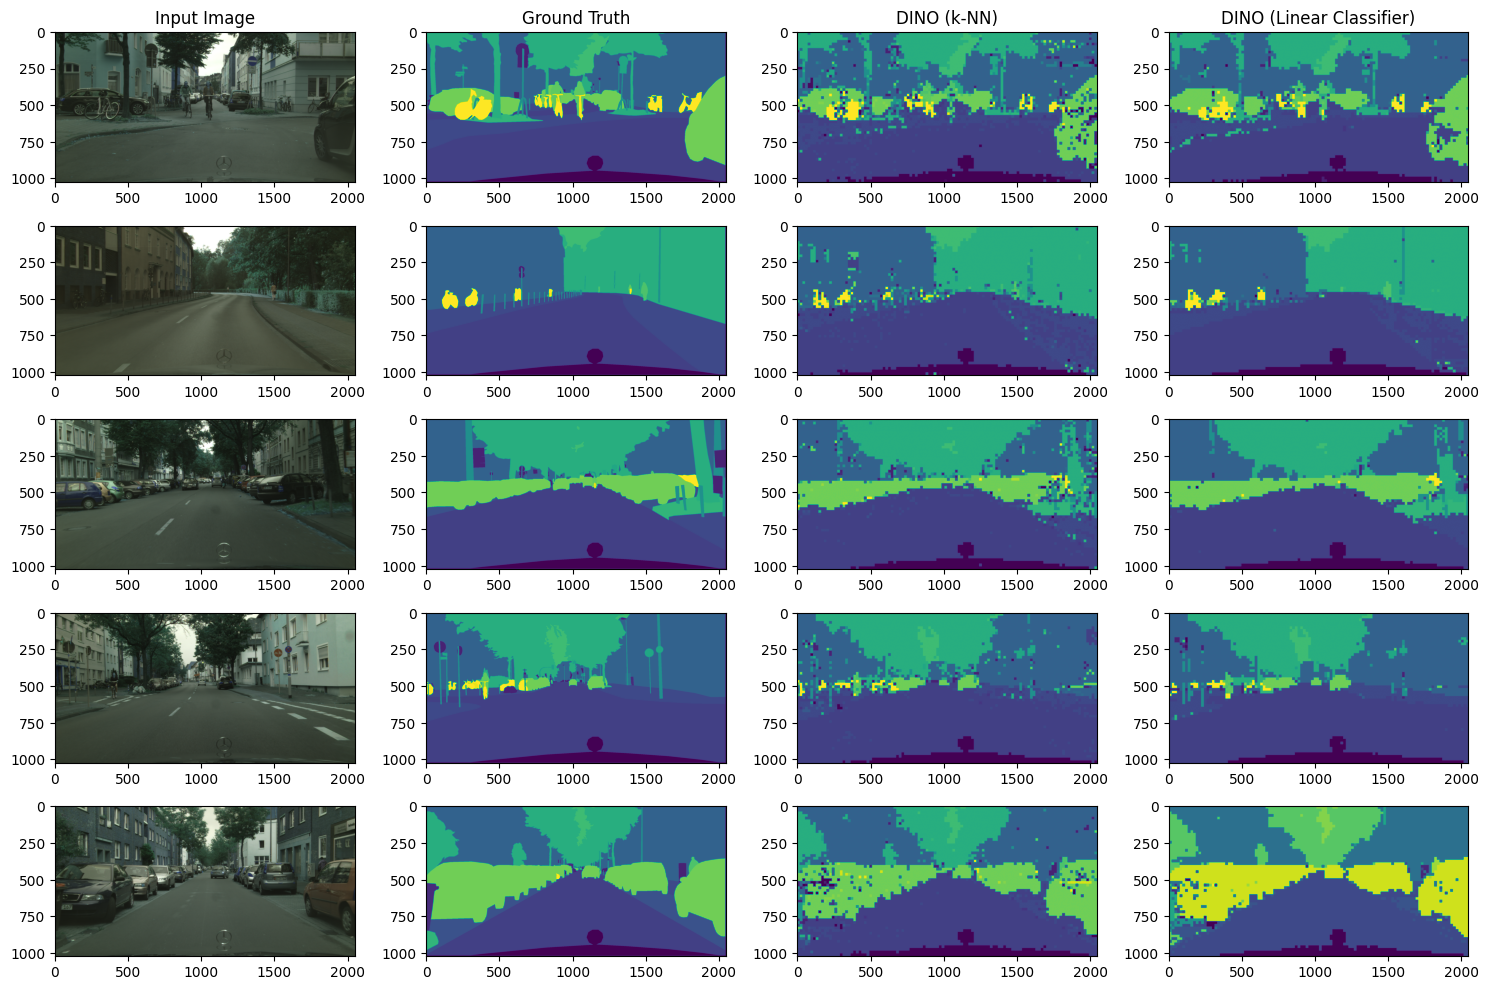

In [182]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))

ax[0][0].set_title("Input Image")
ax[0][1].set_title("Ground Truth")
ax[0][2].set_title("DINO (k-NN)")
ax[0][3].set_title("DINO (Linear Classifier)")

for i in range(5):
    path = linear_mae_pred[i]['file_name'].replace('/leftImg8bit/', '/vision/images/cs/full_ds/')
    ax[i][0].imshow(cv2.imread(path))
    ax[i][1].imshow(linear_mae_pred[i]['black_image'])
    ax[i][2].imshow(knn_dino[i]['patch_labels'])
    ax[i][3].imshow(linear_dino_pred[i]['patch_labels'])
plt.tight_layout()
plt.show()

In [156]:
from torchmetrics.classification import MulticlassStatScores

mcss = MulticlassStatScores(num_classes=34, average=None)

results = mcss(torch.tensor(preds_linear_mae), torch.tensor(gt))

In [157]:
results.shape

torch.Size([34, 5])

In [ ]:
tp, fp, tn, fn, sup

In [ ]:
2 * tp /(2 * tp + fp + fn)

In [158]:
2 * results[:, 0] / (2 * results[:, 0] + results[:, 1] + results[:, 3])

tensor([0.0000e+00, 7.0581e-01, 5.3865e-01, 5.9938e-03, 3.9113e-02, 4.9836e-02,
        1.0310e-01, 8.5737e-01, 4.5055e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00,        nan, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
               nan, 0.0000e+00, 0.0000e+00, 0.0000e+00])

արդիական է օգտագործել բազմաթիվ տվյալների վրա ուսուցված մեծածավալ մոդելները տրված խնդրի համար փոքր մաշտաբներով տվյալների վրա, դրա համար էական է ուսումնասիրել թե ինչպիսի գիտելիքներ են պարունակում այդ մոդելները։

In [159]:
from torchmetrics.functional.classification import multiclass_f1_score


# metric = MultilabelF1Score(num_labels=34)
# metric(preds_linear_dino, gt)

mlf1s = multiclass_f1_score(torch.tensor(preds_linear_mae), torch.tensor(gt), num_classes=34, average=None)
mlf1s

tensor([0.0000e+00, 7.0581e-01, 5.3865e-01, 5.9938e-03, 3.9113e-02, 4.9836e-02,
        1.0310e-01, 8.5737e-01, 4.5055e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [150]:
mlf1s = multiclass_f1_score(torch.tensor(preds_linear_dino), torch.tensor(gt), num_classes=34) #, average=None)
mlf1s

tensor(0.0677)

In [149]:
for i in id_to_name:
    print(mlf1s[i])
mlf1s[np.array(list(id_to_name.keys()))].mean()

tensor(0.8612)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


tensor(0.0453)

In [146]:
list(id_to_name.keys())

[7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]

In [9]:
preds_linear_mae.shape

(188160, 34)

In [10]:
preds_linear_mae[0]

array([2.6577432e-04, 9.3200411e-05, 5.2572130e-05, 3.7134610e-04,
       9.8653161e-04, 1.1165591e-04, 2.2466536e-06, 2.4777341e-07,
       7.4987611e-07, 6.7691224e-05, 7.5371478e-05, 1.2273662e-04,
       1.3952350e-05, 8.7600289e-05, 3.4284341e-04, 9.7592094e-04,
       2.4880929e-04, 9.9577440e-04, 4.4015274e-04, 7.0799660e-04,
       8.6200616e-04, 9.8962808e-01, 1.9315128e-04, 1.0509098e-04,
       2.1497931e-04, 9.2908455e-04, 7.7833698e-05, 3.3160049e-05,
       3.0036207e-04, 3.1406010e-04, 3.6905866e-04, 1.3187158e-04,
       5.2323588e-04, 3.5483600e-04], dtype=float32)

In [11]:
gt.shape

(188160,)

In [47]:
preds_linear_dino

array([[3.8028045e-07, 4.3868182e-05, 1.6714479e-06, ..., 1.7229502e-06,
        7.6833976e-06, 4.4858507e-06],
       [4.6419439e-07, 4.9933999e-05, 4.2397978e-06, ..., 6.3513080e-06,
        1.0371040e-05, 8.1430944e-06],
       [4.2001886e-04, 1.7004770e-04, 5.2253745e-06, ..., 1.6338230e-05,
        4.7782678e-04, 6.4900327e-05],
       ...,
       [4.5955844e-06, 7.8029519e-01, 1.8049868e-04, ..., 4.5011973e-07,
        2.2626243e-06, 7.7651548e-06],
       [5.8731339e-06, 8.4464485e-03, 6.1407383e-04, ..., 2.1008604e-07,
        1.1671904e-05, 8.6151304e-05],
       [6.1912746e-05, 6.8976216e-02, 3.8518996e-03, ..., 2.5120494e-06,
        1.5705269e-05, 1.2399134e-03]], dtype=float32)

In [20]:
preds_linear_mae

array([[2.6577432e-04, 9.3200411e-05, 5.2572130e-05, ..., 1.3187158e-04,
        5.2323588e-04, 3.5483600e-04],
       [2.9188022e-04, 8.6542503e-05, 9.0301866e-05, ..., 5.8817142e-04,
        1.0339731e-03, 4.9391499e-04],
       [1.1340862e-03, 8.6962641e-04, 1.1510629e-03, ..., 1.2854422e-03,
        6.1871097e-03, 7.9466114e-03],
       ...,
       [1.3382639e-03, 1.2471812e-01, 1.1356593e-03, ..., 9.7590184e-04,
        1.4278960e-03, 1.8633517e-03],
       [1.3385285e-03, 9.5037319e-02, 1.0240079e-03, ..., 1.2481355e-03,
        1.6180781e-03, 1.3246044e-03],
       [1.1595445e-03, 6.2235713e-02, 1.8770329e-03, ..., 1.7836295e-03,
        6.6707929e-04, 8.2044100e-04]], dtype=float32)

In [21]:
torch.tensor(preds_linear_mae)

tensor([[2.6577e-04, 9.3200e-05, 5.2572e-05,  ..., 1.3187e-04, 5.2324e-04,
         3.5484e-04],
        [2.9188e-04, 8.6543e-05, 9.0302e-05,  ..., 5.8817e-04, 1.0340e-03,
         4.9391e-04],
        [1.1341e-03, 8.6963e-04, 1.1511e-03,  ..., 1.2854e-03, 6.1871e-03,
         7.9466e-03],
        ...,
        [1.3383e-03, 1.2472e-01, 1.1357e-03,  ..., 9.7590e-04, 1.4279e-03,
         1.8634e-03],
        [1.3385e-03, 9.5037e-02, 1.0240e-03,  ..., 1.2481e-03, 1.6181e-03,
         1.3246e-03],
        [1.1595e-03, 6.2236e-02, 1.8770e-03,  ..., 1.7836e-03, 6.6708e-04,
         8.2044e-04]])

In [60]:
auc_val_mae = auc(torch.tensor(preds_linear_mae), torch.tensor(gt))
auc_val_dino = auc(torch.tensor(preds_linear_dino), torch.tensor(gt))

In [78]:
auc_val_mae.shape

torch.Size([34])

In [96]:
auc_val_mae.mean(), auc_val_dino.mean()

(tensor(0.8202), tensor(0.8406))

In [49]:
fpr_mae, tpr_mae, thresholds = roc(torch.from_numpy(preds_linear_mae), torch.tensor(gt, dtype=torch.int64))
fpr_dino, tpr_dino, thresholds = roc(torch.from_numpy(preds_linear_dino), torch.tensor(gt, dtype=torch.int64))

In [50]:
fpr_mae[0].shape, len(fpr_mae)

(torch.Size([1000]), 34)

In [51]:
classnames = ['road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light',
              'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car',
              'truck', 'bus', 'train', 'motorcycle', 'bicycle']

In [52]:
with open('../pre_process/labels.txt') as f:
    tmp = f.readlines()

In [83]:
tmp

["'unlabeled'            0       255\n",
 "'ego vehicle'          1       255 \n",
 "'rectification border' 2       255 \n",
 "'out of roi'           3       255\n",
 "'static'               4       255\n",
 "'dynamic'              5       255\n",
 "'ground'               6       255\n",
 "'road'                 7       0 \n",
 "'sidewalk'             8       1\n",
 "'parking'              9       255\n",
 "'rail track'           10      255\n",
 "'building'             11      2\n",
 "'wall'                 12      3 \n",
 "'fence'                13      4\n",
 "'guard rail'           14      255 \n",
 "'bridge'               15      255\n",
 "'tunnel'               16      255 \n",
 "'pole'                 17      5\n",
 "'polegroup'            18      255\n",
 "'traffic light'        19      6\n",
 "'traffic sign'         20      7\n",
 "'vegetation'           21      8 \n",
 "'terrain'              22      9 \n",
 "'sky'                  23      10\n",
 "'person'               24  

In [86]:
id_to_name = {}

for name in classnames:
    for line in tmp:
        if f"{name}'" in line:
            idx = int(line.replace(name, '').strip().split()[1])
            id_to_name[idx] = name

In [87]:
id_to_name

{7: 'road',
 8: 'sidewalk',
 11: 'building',
 12: 'wall',
 13: 'fence',
 17: 'pole',
 19: 'traffic light',
 20: 'traffic sign',
 21: 'vegetation',
 22: 'terrain',
 23: 'sky',
 24: 'person',
 25: 'rider',
 26: 'car',
 27: 'truck',
 28: 'bus',
 31: 'train',
 32: 'motorcycle',
 33: 'bicycle'}

In [88]:
fpr_mean_mae = torch.cat([fpr[i].unsqueeze(0) for i in id_to_name], dim=0).mean(dim=0)
tpr_mean_mae = torch.cat([tpr[i].unsqueeze(0) for i in id_to_name], dim=0).mean(dim=0)
fpr_mean_dino = torch.cat([fpr_dino[i].unsqueeze(0) for i in id_to_name], dim=0).mean(dim=0)
tpr_mean_dino = torch.cat([tpr_dino[i].unsqueeze(0) for i in id_to_name], dim=0).mean(dim=0)

In [89]:
fpr_mean_mae.shape, tpr_mean_mae.shape

(torch.Size([1000]), torch.Size([1000]))

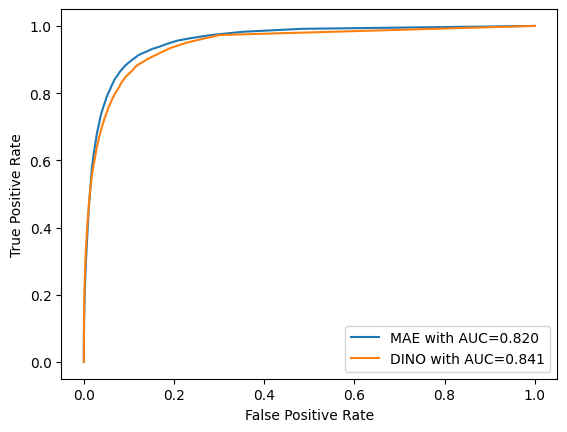

In [90]:
plt.figure()
plt.plot(fpr_mean_mae, tpr_mean_mae, label=f'MAE with AUC={auc_val_mae.mean():.3f}')
plt.plot(fpr_mean_dino, tpr_mean_dino, label=f'DINO with AUC={auc_val_dino.mean():.3f}')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [93]:
for i in id_to_name:
    print(f'{auc_val_mae[i].detach().numpy()}'.replace('.', ','))

0,9630523920059204
0,9481284618377686
0,9800924062728882
0,901114821434021
0,9366338849067688
0,9668868184089661
0,9814125299453735
0,9642499685287476
0,9872472882270813
0,9878202080726624
0,9977644681930542
0,989375114440918
0,9708103537559509
0,9917953610420227
0,9388884902000427
0,988971471786499
0,9103395938873291
0,9653136134147644
0,9823451638221741


In [82]:
id_to_name

{7: 'road',
 8: 'sidewalk',
 11: 'building',
 12: 'wall',
 13: 'fence',
 17: 'pole',
 18: 'pole',
 19: 'traffic light',
 20: 'traffic sign',
 21: 'vegetation',
 22: 'terrain',
 23: 'sky',
 24: 'person',
 25: 'rider',
 26: 'car',
 29: 'car',
 27: 'truck',
 28: 'bus',
 31: 'train',
 32: 'motorcycle',
 33: 'bicycle'}

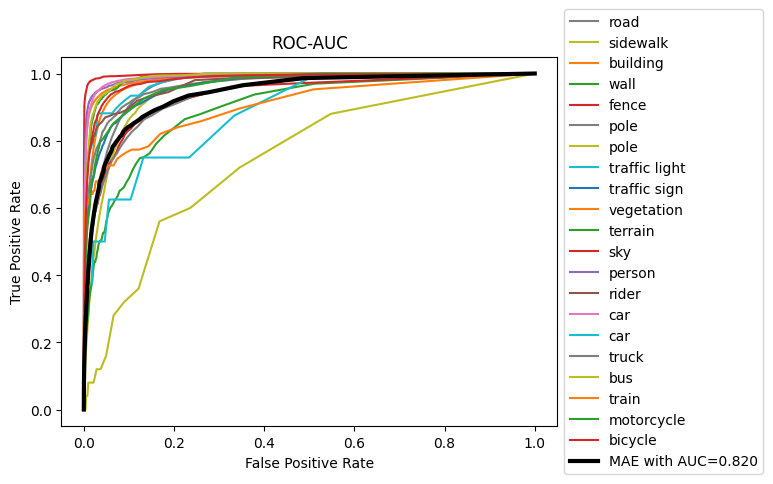

In [74]:
plt.title('ROC-AUC')
for i in id_to_name:
    plt.plot(fpr_mae[i], tpr_mae[i], label=id_to_name[i], color=f'C{i}');
    
plt.plot(fpr_mean_mae, tpr_mean_mae, label=f'MAE with AUC={auc_val_mae.mean():.3f}', lw=3, color='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

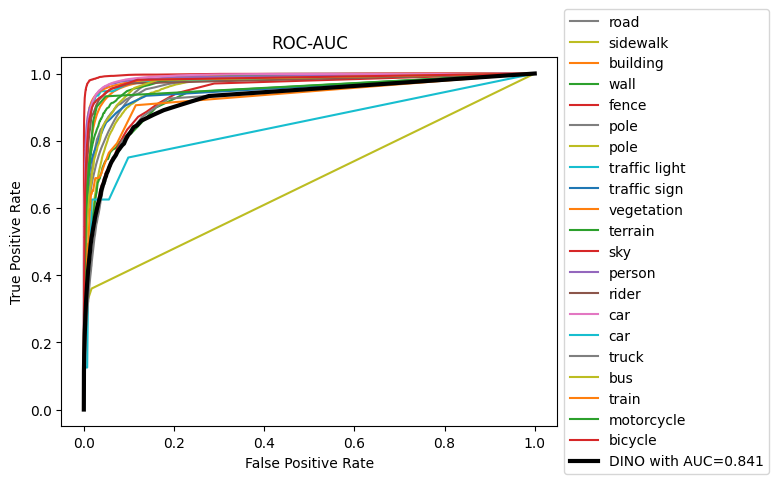

In [73]:
plt.title('ROC-AUC')

for i in id_to_name:
    plt.plot(fpr_dino[i], tpr_dino[i], label=id_to_name[i], color=f'C{i}');
    
plt.plot(fpr_mean_dino, tpr_mean_dino, label=f'DINO with AUC={auc_val_dino.mean():.3f}', lw=3, color='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');